In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('loan-test.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [10]:
df.shape

(289, 12)

(array([131., 124.,  26.,   4.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([    0.  ,  3626.45,  7252.9 , 10879.35, 14505.8 , 18132.25,
        21758.7 , 25385.15, 29011.6 , 32638.05, 36264.5 , 39890.95,
        43517.4 , 47143.85, 50770.3 , 54396.75, 58023.2 , 61649.65,
        65276.1 , 68902.55, 72529.  ]),
 <BarContainer object of 20 artists>)

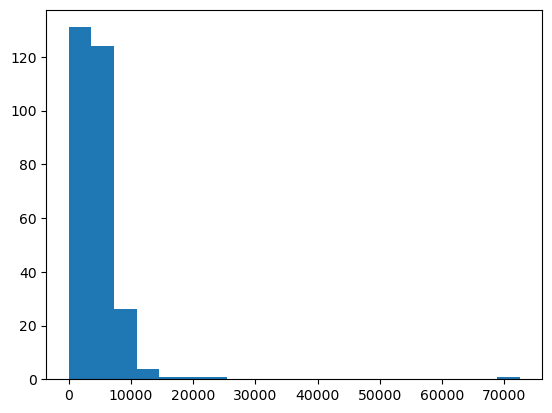

In [15]:
plt.hist(df['ApplicantIncome'],bins=20)

(array([154.,  62.,  44.,  18.,   4.,   1.,   2.,   0.,   0.,   1.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([    0.,  1200.,  2400.,  3600.,  4800.,  6000.,  7200.,  8400.,
         9600., 10800., 12000., 13200., 14400., 15600., 16800., 18000.,
        19200., 20400., 21600., 22800., 24000.]),
 <BarContainer object of 20 artists>)

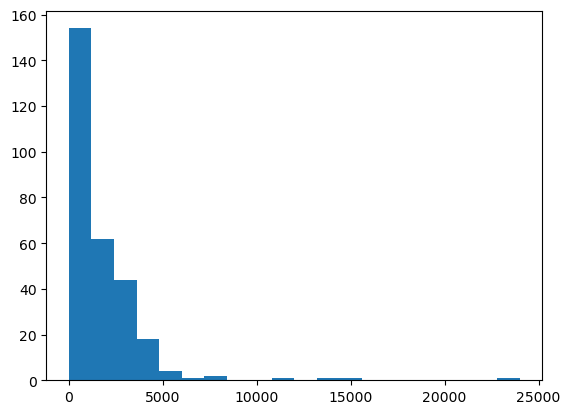

In [16]:
plt.hist(df['CoapplicantIncome'],bins=20)

<Axes: xlabel='Education', ylabel='ApplicantIncome'>

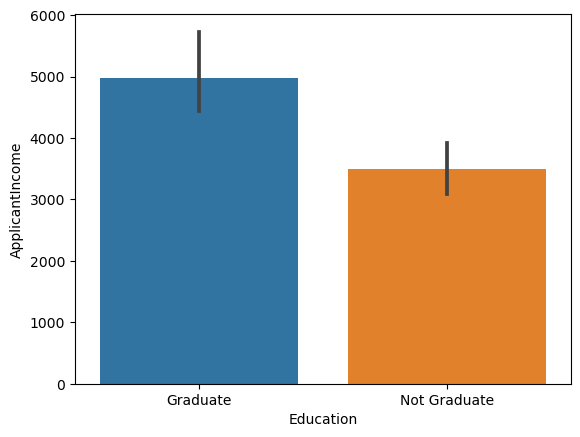

In [23]:
sns.barplot(data=df,x='Education',y='ApplicantIncome')

hence most of the applicants are graduated, lets move furthur!

(array([ 5.,  6., 13., 17., 24., 40., 44., 36., 30., 18., 13., 16.,  7.,
         1.,  4.,  3.,  2.,  1.,  4.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,
         1.,  0.,  0.,  1.]),
 array([ 28. ,  42.4,  56.8,  71.2,  85.6, 100. , 114.4, 128.8, 143.2,
        157.6, 172. , 186.4, 200.8, 215.2, 229.6, 244. , 258.4, 272.8,
        287.2, 301.6, 316. , 330.4, 344.8, 359.2, 373.6, 388. , 402.4,
        416.8, 431.2, 445.6, 460. ]),
 <BarContainer object of 30 artists>)

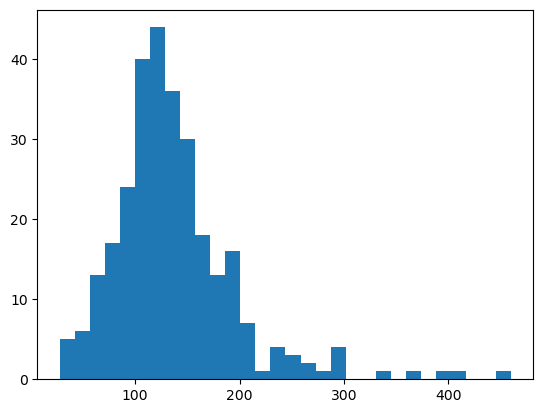

In [25]:
plt.hist(df['LoanAmount'],bins=30)

<Axes: xlabel='Gender', ylabel='LoanAmount'>

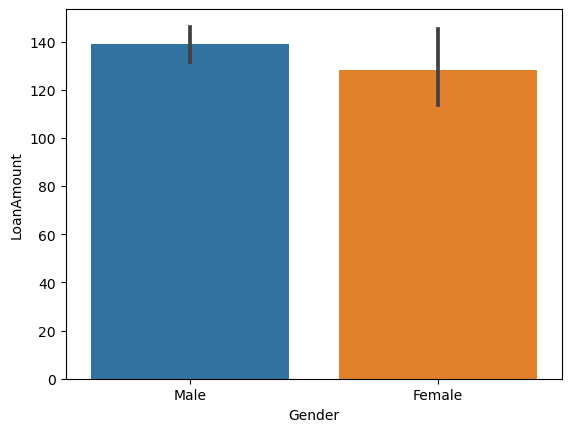

In [26]:
sns.barplot(data=df,x='Gender',y='LoanAmount')

hence most of the loan amount is pending by male sector, lets explore furthur!

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

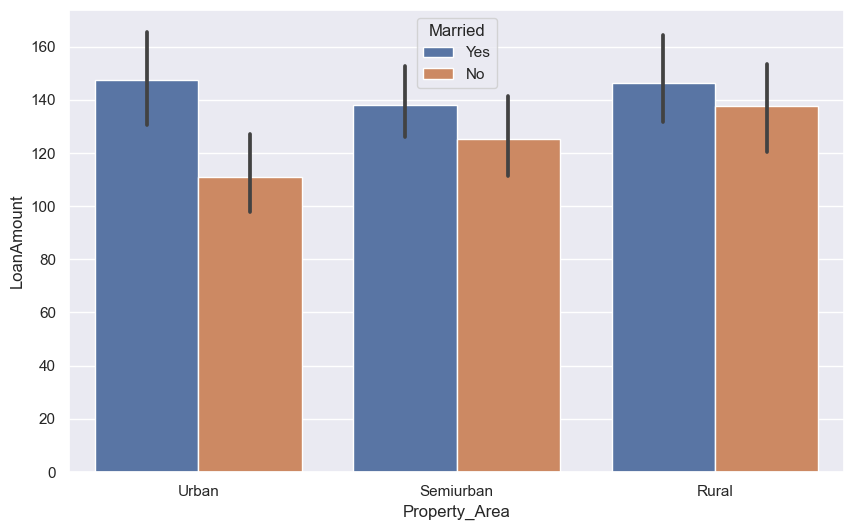

In [35]:
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(data=df,x='Property_Area',y='LoanAmount',hue='Married')

most of the loan amount is pending in rural areas and most of them are married too

<Axes: xlabel='TotalIncome', ylabel='Count'>

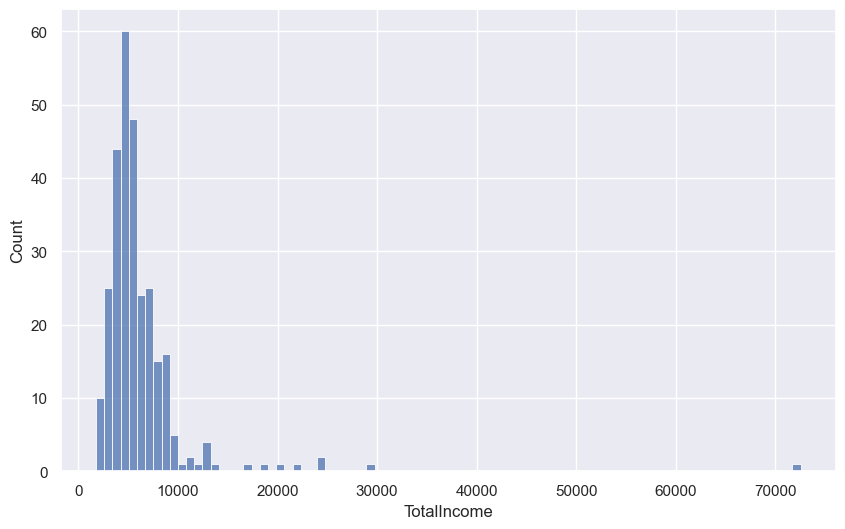

In [33]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
sns.histplot(df['TotalIncome'])

<Axes: xlabel='Gender', ylabel='TotalIncome'>

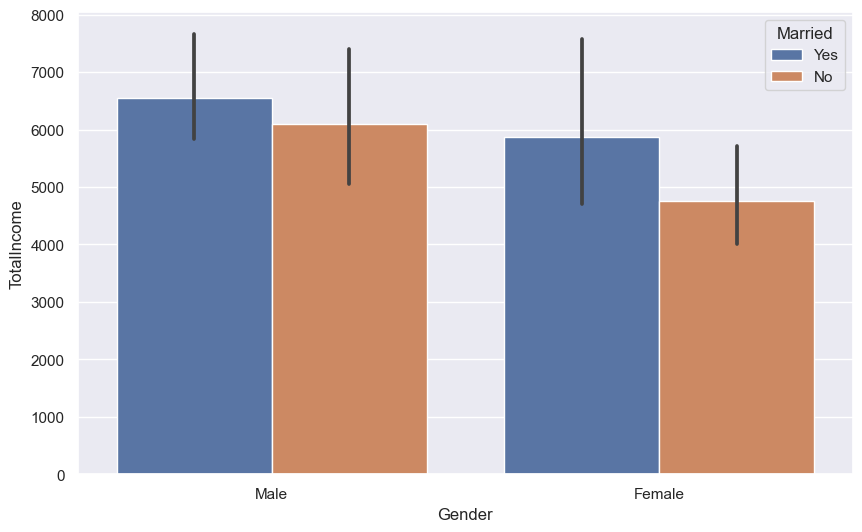

In [36]:
sns.barplot(data=df,x='Gender',y='TotalIncome',hue='Married')

hence most of married men have more total income than women,lets explore more

<Axes: xlabel='Property_Area', ylabel='TotalIncome'>

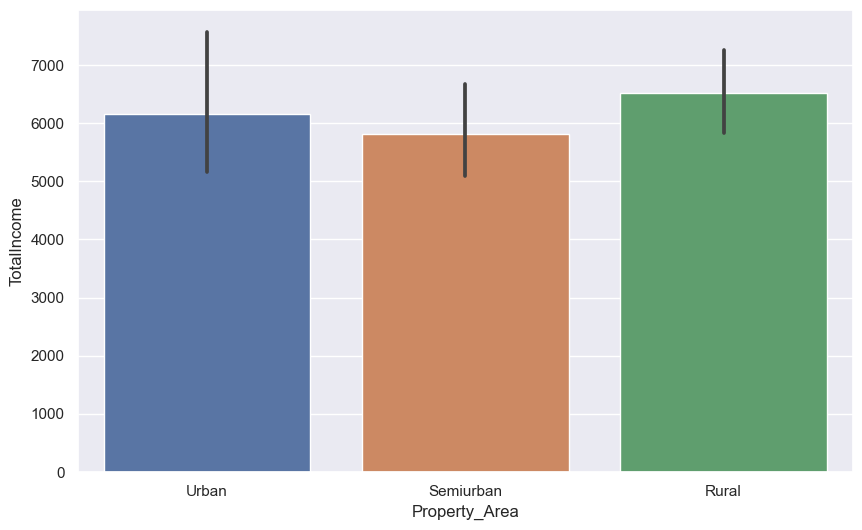

In [37]:
sns.barplot(data=df,x='Property_Area',y='TotalIncome')

totalincome is earned most in rural areas

In [39]:
pd.crosstab(df['Gender'],df['Self_Employed'])

Self_Employed,No,Yes
Gender,,
Female,56,3
Male,201,29


In [41]:
df['Self_Employed']=df['Self_Employed'].map({'Yes':1, 'No':0})

<Axes: xlabel='Gender', ylabel='Self_Employed'>

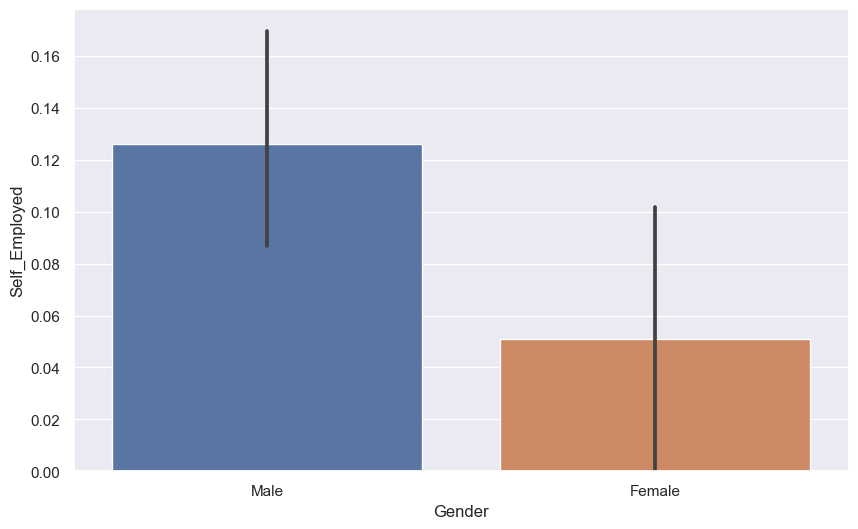

In [44]:
sns.barplot(data=df,x='Gender',y='Self_Employed')

hence most of the male are self employed

so by conclusion, most of the applicants are self employed married men who have completed their graduation, having the maximum loan amount as well as total income, accomodated in rural area